   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anx

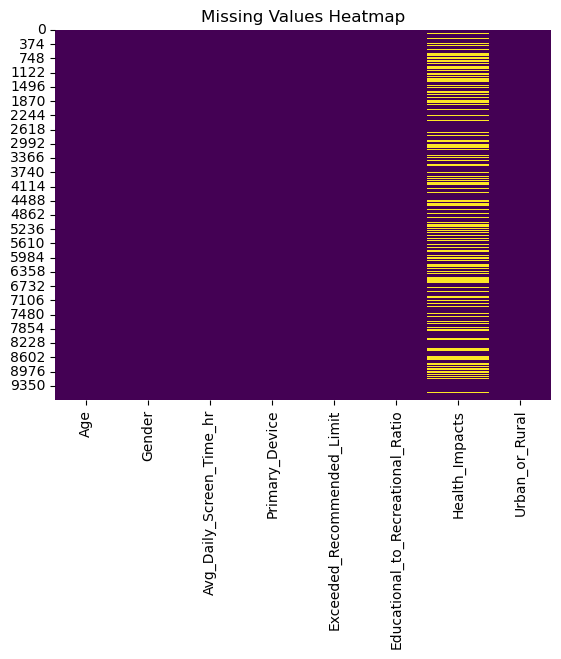

44
(9668, 8)
                                        Age  Avg_Daily_Screen_Time_hr  \
Age                                1.000000                  0.108873   
Avg_Daily_Screen_Time_hr           0.108873                  1.000000   
Educational_to_Recreational_Ratio -0.488017                 -0.081445   

                                   Educational_to_Recreational_Ratio  
Age                                                        -0.488017  
Avg_Daily_Screen_Time_hr                                   -0.081445  
Educational_to_Recreational_Ratio                           1.000000  


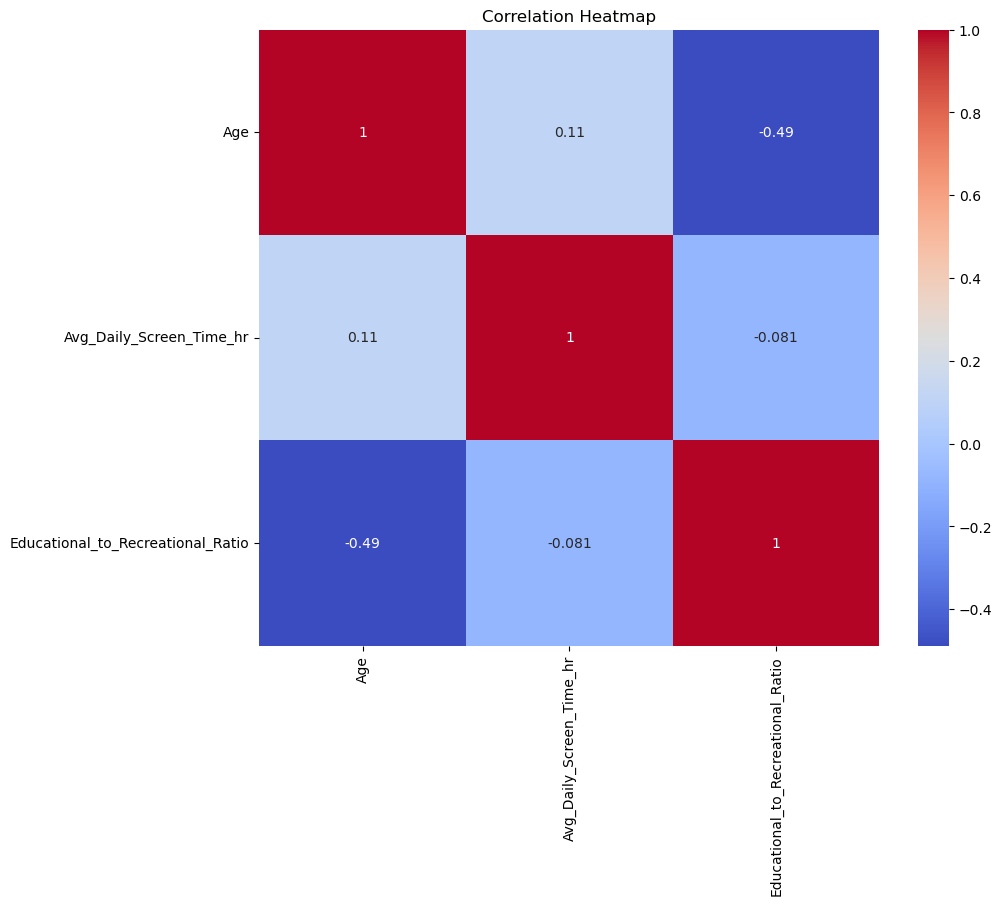

<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB
None
Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
E

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:\Indian_Kids_Screen_Time.csv'
df = pd.read_csv(file_path)

print(df.head())

print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

numeric_df = df.select_dtypes(include=np.number)

print(numeric_df.corr())
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print(df.info())

print(df.dtypes)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
print(outliers.sum())

df_clean = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_clean.shape)
